In [1]:
import pandas as pd 
df=pd.read_csv('./clean.csv', encoding='latin-1',sep=";")
df.head()

,Ordre de travail,Equipment,Noeud Parent,Classification Equipement,Date début,Type OT
0,OT000001,GCULZ201,GCULZ2,MECANIQUE,03/01/2019,correctif planifié
1,OT000002,GCULZ103,GCULZ1,MECANIQUE,02/01/2019,correctif planifié
2,OT000003,ULPRPH0104,ULPRPH01,MECANIQUE,03/01/2019,correctif planifié
3,OT000011,ULPRPH0104,ULPRPH01,MECANIQUE,03/01/2019,correctif planifié
4,OT000015,ULPRDV0103,ULPRDV01,MECANIQUE,01/01/2019,correctif planifié


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

<BarContainer object of 10 artists>

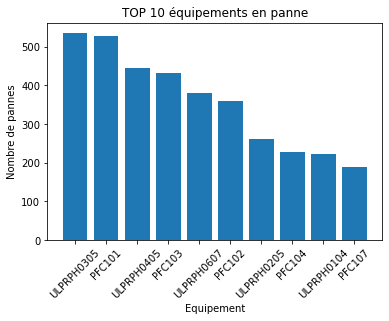

In [3]:
df_st=df.groupby(['Equipment']).count() 
df_st1=df_st['Ordre de travail']
df_st2= df_st1.rename_axis('Equipement').reset_index()
df_st2.rename(columns={'Ordre de travail': 'Nombre de pannes'}, inplace=True)
top10=df_st2.sort_values('Nombre de pannes',ascending=False).head(10) 
plt.xticks(rotation='45')
plt.title("TOP 10 équipements en panne")
plt.xlabel('Equipement')
plt.ylabel("Nombre de pannes")
plt.bar(top10['Equipement'],top10['Nombre de pannes'])

<BarContainer object of 10 artists>

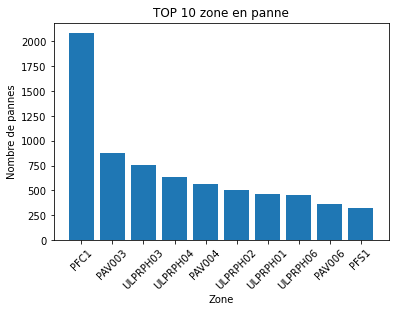

In [4]:
df_st=df.groupby(['Noeud Parent']).count()
df_st1=df_st['Ordre de travail']
df_st2= df_st1.rename_axis('Noeud Parent').reset_index()
df_st2.rename(columns={'Ordre de travail': 'Nombre de pannes'}, inplace=True)
top10=df_st2.sort_values('Nombre de pannes',ascending=False).head(10)
plt.xticks(rotation='45')
plt.title("TOP 10 zone en panne")
plt.xlabel('Zone')
plt.ylabel("Nombre de pannes")
plt.bar(top10['Noeud Parent'],top10['Nombre de pannes'])

([<matplotlib.patches.Wedge at 0x19ec1b54ac0>,
 [Text(-0.7988779806097339, 0.7561705972179253, ''),
  Text(0.7988779098119299, -0.7561706720142763, '')],
 [Text(-0.43575162578712756, 0.4124566893915956, '75.9%'),
  Text(0.43575158717014356, -0.4124567301896052, '24.1%')])

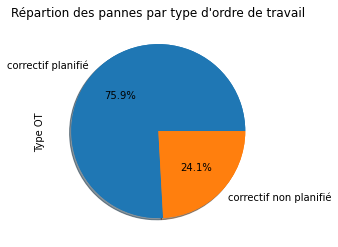

In [5]:
df["Type OT"].value_counts(normalize=True).plot(kind='pie')
plt.title("Répartion des pannes par type d'ordre de travail")
colors = ['lightblue', 'navy']
plt.pie(df["Type OT"].value_counts(),autopct='%1.1f%%',shadow=True)


([<matplotlib.patches.Wedge at 0x19ec1c2ff40>],
 [Text(-2.0206672185931328e-16, -1.1, '')],
 [Text(-1.1021821192326178e-16, -0.6, '100.0%')])

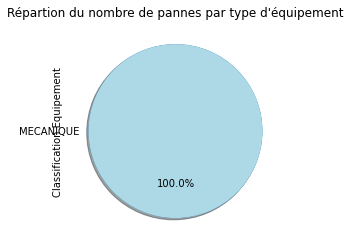

In [6]:
df["Classification Equipement"].value_counts(normalize=True).plot(kind='pie')
plt.title("Répartion du nombre de pannes par type d'équipement")
colors = ['lightblue', 'beige','oldlace','bisque','mediumslateblue','mediumaquamarine','palegreen']

plt.pie(df["Classification Equipement"].value_counts(), colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)